<a href="https://colab.research.google.com/github/harsheev/CBC_NewsArticles/blob/master/Model_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **This notebook uses pyLDAvis toolset to visualize the selected LDA model and draw other insights which help in better understanding the different topics.**

In [1]:
#@title Set up Directory { run: "auto"}
import os
from IPython.display import clear_output
from google.colab import drive 
from IPython.display import clear_output
drive.mount('/content/gdrive')
working_directory = 'My Drive/LDA_CBC_NewsArticles' #@param {type:"string"}
wd="/content/gdrive/"+working_directory
os.chdir(wd)

dirpath = os.getcwd()
print("current directory is : " + dirpath)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
current directory is : /content/gdrive/My Drive/LDA_CBC_NewsArticles


In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 8.2MB/s 
     |████████████████████████████████| 552kB 33.8MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=358288294a921cdc7385125451848254fe5e9838d20fef1bb5aa55bce426964c
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=fd830cb43eb297fe30d7d63abe670ef5c6248a0d29bcd052a7edb0d772fb860f
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [ ]:
import pandas as pd
import numpy as np
import gensim
import pyLDAvis
import pyLDAvis.gensim  
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

In [ ]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
text = pickle.load(open('text_data.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model15.gensim')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
lda_vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_vis)

In [ ]:
#Function to assign each document to it's corresponding topic number
def format_topics_sentences(ldamodel=lda, corpus=corpus, texts=text):
    # Initialize dataframe
    topics_df = pd.DataFrame()

    # Get main topic for each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Percentage Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                topics_df = topics_df.append(pd.Series([int(topic_num), round(prop_topic,3), topic_keywords]), ignore_index=True)
            else:
                break
    topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    topics_df = pd.concat([topics_df, contents], axis=1)
    return(topics_df)


df_topics = format_topics_sentences(ldamodel=lda, corpus=corpus, texts=text)

# Format
df_dominant_topic = df_topics.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']


df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,1.0,"coronavirus, canada, canadian, president, stat...","[network, sunday, scrum, panel, destination, f..."
1,1,2.0,1.0,"pandemic, minister, covid-19, prime, worker, t...","[overacker, laurell, pallot, start, straight, ..."
2,2,8.0,0.0,"health, coronavirus, covid-19, test, novel, of...","[coronavirus, continue, spread, include, bruns..."
3,3,6.0,0.0,"coronavirus, outbreak, china, question, answer...","[today, morning, brief, call, canadian, listen..."
4,4,8.0,0.0,"health, coronavirus, covid-19, test, novel, of...","[official, working, reach, people, contact, do..."
...,...,...,...,...,...
6766,6766,9.0,1.0,"pandemic, coronavirus, ottawa, world, latest, ...","[close, kanata, hotel, midst, retrofit, accomm..."
6767,6767,7.0,1.0,"covid-19, school, child, student, learning, fa...","[education, minister, françois, roberge, detai..."
6768,6768,9.0,1.0,"pandemic, coronavirus, ottawa, world, latest, ...","[company, foreign, tanker, delivery, domestic,..."
6769,6769,11.0,1.0,"covid-19, people, pandemic, province, governme...","[toronto, condo, resident, despite, short, ren..."


In [ ]:
#Distribution of number of documents over each topic

# Number of Documents for Each Topic
topic_counts = df_topics['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topics[['Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Topic_Keywords', 'Num_Documents', 'Perc_Documents']

topic_contribution= df_dominant_topics.head(15)
topic_contribution.index = np.arange(1, len(topic_contribution)+1)

In [ ]:
topic_contribution

,Topic_Keywords,Num_Documents,Perc_Documents
1,"coronavirus, canada, canadian, president, stat...",298.0,0.0440
2,"pandemic, minister, covid-19, prime, worker, t...",322.0,0.0476
3,"health, coronavirus, covid-19, test, novel, of...",520.0,0.0768
4,"coronavirus, outbreak, china, question, answer...",388.0,0.0573
5,"health, coronavirus, covid-19, test, novel, of...",296.0,0.0437
6,"health, coronavirus, covid-19, test, novel, of...",266.0,0.0393
7,"pandemic, coronavirus, ottawa, world, latest, ...",439.0,0.0648
8,"covid-19, school, child, student, learning, fa...",398.0,0.0588
9,"coronavirus, outbreak, china, question, answer...",878.0,0.1297
10,"covid-19, people, pandemic, province, governme...",398.0,0.0588


# **NOTE:**
Sometimes it is hard to understand what different topics are talking about just by looking at the keywords for each topic. To solve this problem we can look at the most representative documents for each topic and infer the meaning for a topic based on that. 

In [ ]:
#group top 5 documents under each topic

top_docs= pd.DataFrame()
grpd_topics= df_topics.groupby('Dominant_Topic')

for i,grp in grpd_topics:
  top_docs= pd.concat([top_docs,grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)],axis=0)

top_docs.reset_index(drop=True,inplace=True)
top_docs.columns=['Topic_Num','Topic_Perc_Contrib', 'Keywords', 'Text']
#show
top_docs

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,1.0,"covid-19, province, could, canadian, happening...","[researcher, university, saskatchewan, success..."
1,1.0,1.0,"covid-19, cancel, pandemic, event, season, sum...","[canada, temporarily, 15,000, unionize, worker..."
2,2.0,1.0,"pandemic, minister, covid-19, prime, worker, t...","[overacker, laurell, pallot, start, straight, ..."
3,3.0,1.0,"coronavirus, canada, canadian, president, stat...","[network, sunday, scrum, panel, destination, f..."
4,4.0,1.0,"community, pandemic, first, nation, local, cov...","[brunswick, charity, rescue, rehabilitate, inj..."
5,5.0,1.0,"emergency, hospital, worker, covid-19, tempora...","[employee, unpaid, protect, leave, unable, cov..."
6,6.0,1.0,"coronavirus, outbreak, china, question, answer...","[chinese, government, expert, confirm, human, ..."
7,7.0,1.0,"covid-19, school, child, student, learning, fa...","[group, thunder, resident, using, printer, per..."
8,8.0,1.0,"health, coronavirus, covid-19, test, novel, of...","[quebec, public, health, director, urging, mem..."
9,9.0,1.0,"pandemic, coronavirus, ottawa, world, latest, ...","[ottawa, latest, roundup, point, coronavirus, ..."


Topic Number: 1


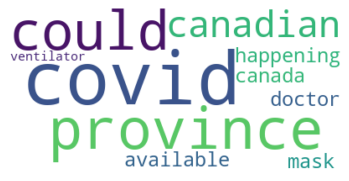

Topic Number: 2


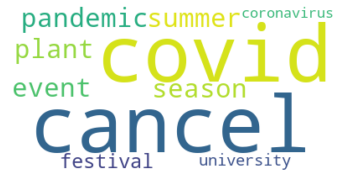

Topic Number: 3


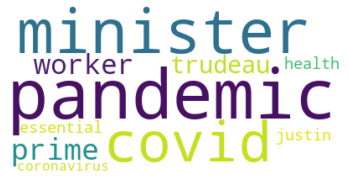

Topic Number: 4


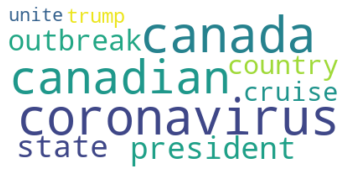

Topic Number: 5


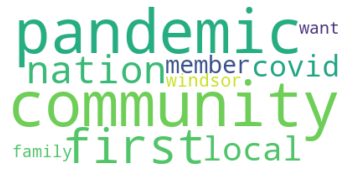

Topic Number: 6


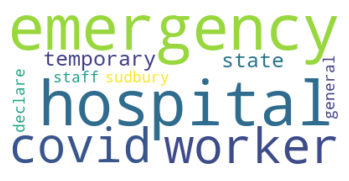

Topic Number: 7


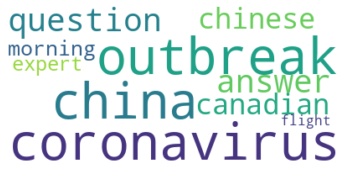

Topic Number: 8


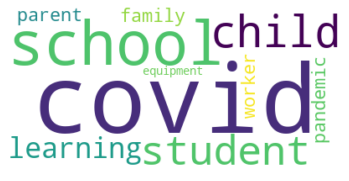

Topic Number: 9


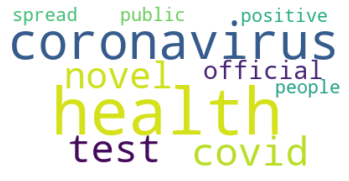

Topic Number: 10


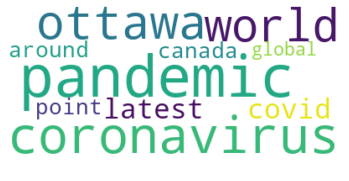

Topic Number: 11


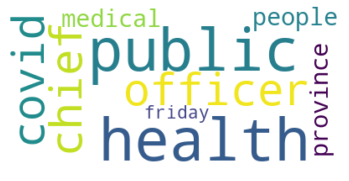

Topic Number: 12


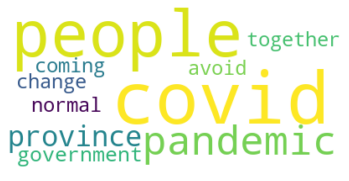

Topic Number: 13


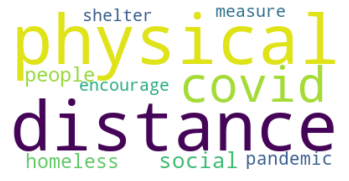

Topic Number: 14


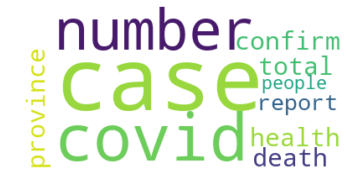

Topic Number: 15


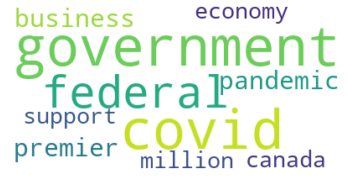

In [ ]:
#Wordcloud for each topic containing keywords from the most dominant document from that topic
for i in range(15):
  print(f'Topic Number: {i+1}')
  lng_str= top_docs['Keywords'][i]
  wordcloud= WordCloud(stopwords=en_stop,background_color= 'white',max_words=50,contour_width=0,contour_color= 'steelblue')
  wordcloud.generate(lng_str)
  plt.imshow(wordcloud,interpolation= 'bilinear')
  plt.axis('off')
  plt.show()